
Anomaly detection: The Keras MNIST dataset can be used to detect anomalies or outliers in the dataset. For example, if there are images in the dataset that are significantly different from the other images, a deep learning model can be trained to identify these outliers.This could be useful, for example, if there are corrupted or mislabeled images in the dataset that could negatively impact the performance of a deep learning model trained on the dataset.

Anomaly detection using deep learning typically involves training a model on the normal or non-anomalous examples in the dataset, and then using the trained model to identify images outliers. This can be done using a variety of methods, such as measuring the distance between the input image and the model's learned representations of the normal examples, or using a generative model to compare the input image to the model's learned distribution of the normal examples.

Anomaly detection is an important problem in machine learning and data science because it has many practical applications in various domains such as fraud detection, intrusion detection, and medical diagnosis. In many cases, anomalous data points are rare and hard to identify manually, which makes it difficult to detect them using traditional rule-based or statistical methods. Deep learning models, on the other hand, are capable of learning complex patterns and relationships in the data, which makes them effective at identifying anomalies.

In MNIST dataset, anomaly detection can be important for several reasons. First, the dataset is widely used as a benchmark dataset for image classification tasks, and ensuring that the dataset is of high quality can improve the performance of deep learning models trained on the dataset. Second, dataset is a synthetic dataset, and as such, it may contain anomalies or outliers that are not representative of real-world handwritten digits. Identifying and removing these anomalies can help ensure that the dataset is more representative of real-world data. Finally, anomaly detection can also be useful in scenarios where the dataset is dynamic and new anomalies may appear over time, such as in medical diagnosis, where new rare diseases may be discovered. In such scenarios, deep learning models trained for anomaly detection can help identify new anomalies and improve the accuracy of the diagnosis.

# Data Collection/Processing  and Exploration 

Training images shape: (60000, 28, 28)
Training images data type: uint8
Training labels shape: (60000,)
Training labels data type: uint8
Test images shape: (10000, 28, 28)
Test images data type: uint8
Test labels shape: (10000,)
Test labels data type: uint8
Number of unique labels: 10


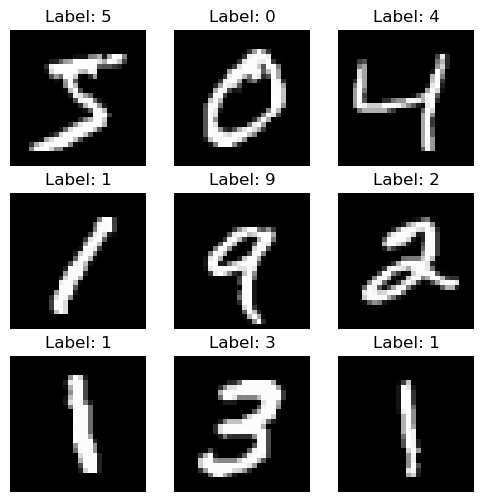

In [43]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the shape and data type of the datasets
print('Training images shape:', train_images.shape)
print('Training images data type:', train_images.dtype)
print('Training labels shape:', train_labels.shape)
print('Training labels data type:', train_labels.dtype)
print('Test images shape:', test_images.shape)
print('Test images data type:', test_images.dtype)
print('Test labels shape:', test_labels.shape)
print('Test labels data type:', test_labels.dtype)

# Print the number of unique labels
print('Number of unique labels:', len(np.unique(train_labels)))

# Plot some sample images
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_images[i], cmap='gray')
    axi.set(title=f'Label: {train_labels[i]}')
    axi.axis('off')
plt.show()



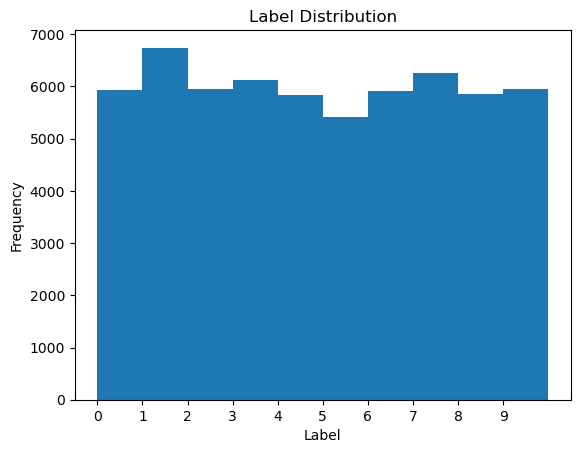

In [44]:
fig, ax = plt.subplots()
ax.hist(train_labels, bins=range(11))
ax.set_xticks(range(10))
ax.set(title='Label Distribution', xlabel='Label', ylabel='Frequency')
plt.show()


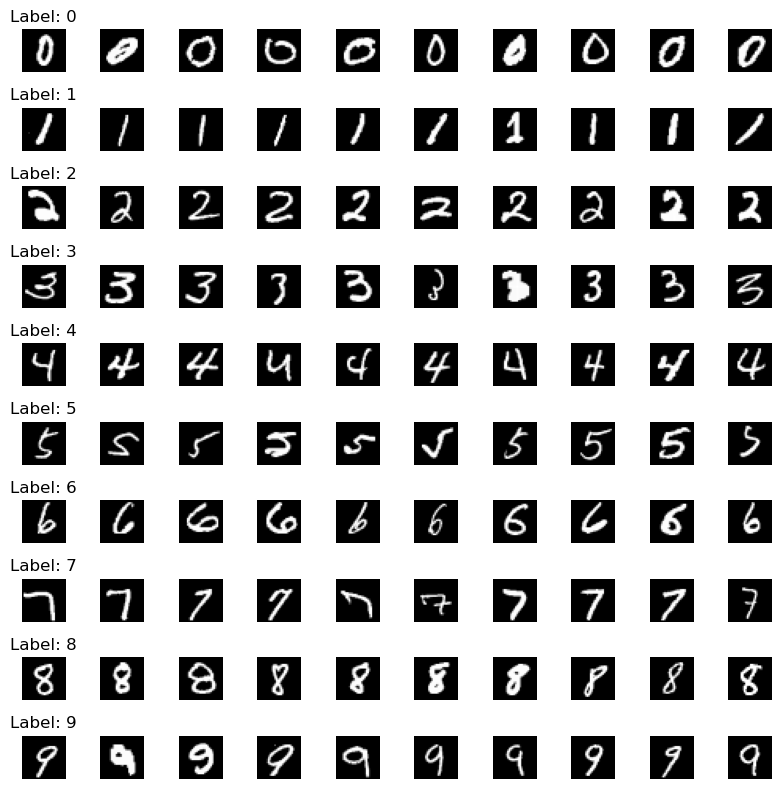

In [45]:
# Create a dictionary mapping labels to indices
label_indices = {label: np.where(train_labels == label)[0] for label in range(10)}

# Plot a grid of example images for each class
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
for i in range(10):
    indices = np.random.choice(label_indices[i], size=10, replace=False)
    for j, idx in enumerate(indices):
        ax[i, j].imshow(train_images[idx], cmap='gray')
        ax[i, j].axis('off')
        if j == 0:
            ax[i, j].set(title=f'Label: {i}')
plt.tight_layout()
plt.show()


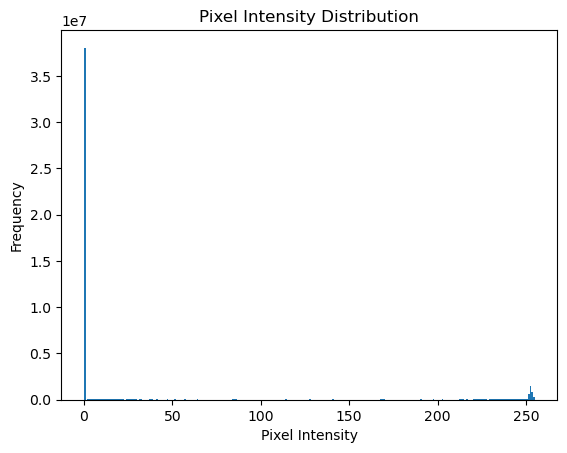

In [46]:
fig, ax = plt.subplots()
ax.hist(train_images.flatten(), bins=256)
ax.set(title='Pixel Intensity Distribution', xlabel='Pixel Intensity', ylabel='Frequency')
plt.show()


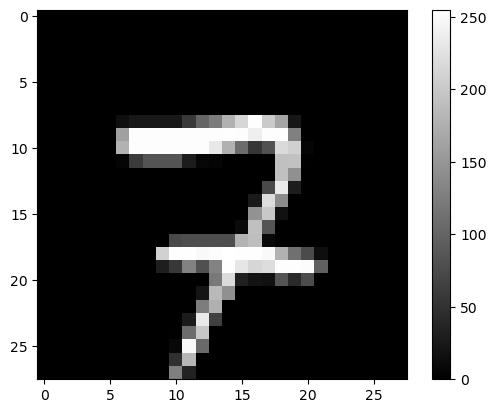

Pixel values:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  14  24  24  24  24  56 

In [47]:
import matplotlib.pyplot as plt

# Select a random image from the training dataset
idx = np.random.choice(train_images.shape[0], size=1)[0]
img = train_images[idx]

# Display the pixel values of the image
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

# Display the pixel values as a matrix
print("Pixel values:")
print(img)




In [48]:
# Reshape the training dataset to be 2D
train_images_2d = train_images.reshape(train_images.shape[0], 28*28)

# Print the shape and type of the training dataset
print("Shape of training dataset:", train_images_2d.shape)
print("Type of training dataset:", type(train_images_2d))

# Print the minimum and maximum values of the training dataset
print("Minimum pixel value:", np.min(train_images_2d))
print("Maximum pixel value:", np.max(train_images_2d))

# Print the mean and standard deviation of the training dataset
print("Mean pixel value:", np.mean(train_images_2d))
print("Standard deviation of pixel values:", np.std(train_images_2d))


Shape of training dataset: (60000, 784)
Type of training dataset: <class 'numpy.ndarray'>
Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 33.318421449829934
Standard deviation of pixel values: 78.56748998339798


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

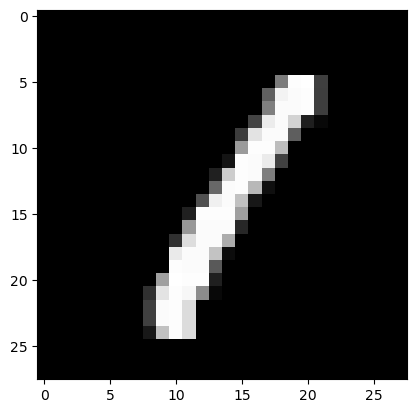

In [49]:


# Select an image to display
img_idx = 3

img = train_images[img_idx]
lable= train_labels[img_idx]

# Display the image using pyplot.imshow()
plt.imshow(img, cmap='gray')

# Print the underlying matrix for the image
print(img)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

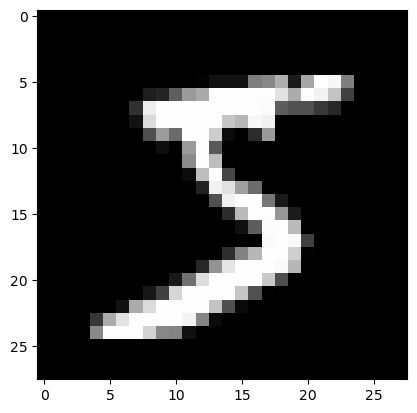

In [50]:
# Select an image to display
img_idx = 0

img = train_images[img_idx]
lable= train_labels[img_idx]

# Display the image using pyplot.imshow()
plt.imshow(img, cmap='gray')

# Print the underlying matrix for the image
print(img)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

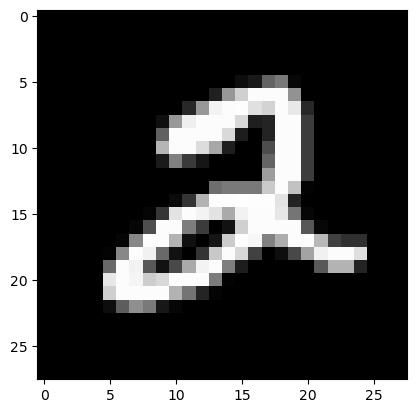

In [51]:
# Select an image to display
img_idx = 5

img = train_images[img_idx]
lable= train_labels[img_idx]

# Display the image using pyplot.imshow()
plt.imshow(img, cmap='gray')

# Print the underlying matrix for the image
print(img)


For the solution of Anomoly detection I am trying to implement different deep learning models such as CNN, MLP and RNN. 


*MLP*: MLP stands for Multi-Layer Perceptron. It is a feedforward neural network that is composed of multiple layers of neurons, including input, output, and hidden layers. Each neuron is connected to every neuron in the next layer through weights. MLP can learn non-linear relationships in data and is widely used for regression and classification tasks.

*_CNN_*: CNN stands for Convolutional Neural Network. It is a deep learning model designed for image recognition and processing. CNNs have the ability to automatically learn spatial hierarchies of features from raw pixel inputs. They consist of multiple convolutional layers that apply filters to the input image, followed by pooling layers that reduce the spatial dimensions of the output. Finally, fully connected layers are used to make predictions based on the learned features.

*_RNN_*: RNN stands for Recurrent Neural Network. It is a type of neural network designed for processing sequential data, such as time series, natural language, or speech data. RNNs have a feedback loop that allows the network to use information from previous inputs to influence the current output. This ability to retain information about the sequence is what makes RNNs effective for modeling sequential data.








The main difference between the MLP and CNN models is in the structure of the layers.

In the MLP model, we use fully connected layers, where each neuron is connected to every neuron in the previous layer. The input is flattened to a 1D array and passed through multiple hidden layers before reaching the output layer.

On the other hand, in the CNN model, we use convolutional layers that extract features from the input images, followed by pooling layers that downsample the output of the convolutional layers. This process of feature extraction and downsampling is repeated several times, and then the output is flattened and passed through fully connected layers before reaching the output layer.

In summary, the CNN model is specifically designed to work with image data, and uses a hierarchical approach to extract features from the input data, while the MLP model is a more general-purpose model that can be used for various types of data, but may not be as effective for image data due to the lack of hierarchical feature extraction.



##### MLP (Multilayer Perceptron) Model:

This model consists of a single input layer, one or more hidden layers, and an output layer.
We train this model on the MNIST dataset to classify images of handwritten digits into their respective classes (0-9).
To detect anomalies in this model, we calculate the reconstruction error between the input image and the output image from the MLP model. We then set a threshold value for the reconstruction error and consider images with reconstruction errors higher than the threshold as anomalous.

##### CNN (Convolutional Neural Network) Model:

This model is also trained on the MNIST dataset, but it uses convolutional layers to extract features from the images, followed by pooling layers to reduce the dimensions and a fully connected layer to make the final classification.
To detect anomalies in this model, we follow the same approach as with MLP and calculate the reconstruction error between the input image and the output image from the CNN model. We then set a threshold value for the reconstruction error and consider images with reconstruction errors higher than the threshold as anomalous.


##### RNN (Recurrent Neural Network) Model:
RNNs can also be used for anomaly detection in MNIST data. One way to do this is by training an RNN to reconstruct the input sequence of images, and then using the reconstruction error to identify anomalous samples. For example, you could use an LSTM-based autoencoder to reconstruct the input sequence of images, where the encoder maps each image to a lower-dimensional representation and the decoder maps the lower-dimensional representation back to an image. During training, you would optimize the parameters of the autoencoder to minimize the reconstruction error between the input sequence and the reconstructed sequence.To detect anomalies in new samples, you would pass them through the trained autoencoder and calculate the reconstruction error. Samples with high reconstruction error are likely to be anomalous.

CNNs are generally better suited for image classification tasks than MLPs. This is because CNNs are designed to capture spatial relationships in images, whereas MLPs treat each pixel in an image as a separate input feature. This can result in a large number of weights to learn, which can lead to overfitting and poor performance.

CNNs, on the other hand, use convolutional layers to extract local features from images, and pooling layers to reduce the dimensionality of the feature maps. This allows the model to learn important features at different scales and locations in the image, while keeping the number of parameters relatively small. Additionally, the use of weight sharing in convolutional layers allows the model to learn features that are translation invariant, meaning they can recognize the same feature regardless of where it appears in the image.

Overall, CNNs tend to outperform MLPs on image classification tasks, particularly when dealing with larger and more complex datasets. However, MLPs can still be effective on simpler image datasets, or when the goal is to classify based on features other than spatial relationships (such as color or texture).

##### RNN for anamoly detection

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, LSTM, RepeatVector
from tensorflow.keras.models import Model

# Load the MNIST dataset
(image_train, _), (image_test, _) = mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add noise to the test set for anomaly detection
noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the RNN model
inputs = Input(shape=(28, 28))
encoded = LSTM(64)(inputs)
decoded = RepeatVector(28)(encoded)
decoded = LSTM(64, return_sequences=True)(decoded)
decoded = Dense(28, activation='sigmoid')(decoded)

rnn_autoencoder = Model(inputs, decoded)

# Train the model and store the training history
history = rnn_autoencoder.fit(x_train, x_train,
                              epochs=20,
                              batch_size=128,
                              shuffle=True,
                              validation_data=(x_test, x_test))
# Compile the model
rnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
rnn_autoencoder.fit(x_train, x_train,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(x_test, x_test))

# Generate predictions for the test set
rnn_predictions = rnn_autoencoder.predict(x_test_noisy)

# Calculate the mean squared error (MSE) between the test set and the predictions
rnn_mse = np.mean(np.power(x_test_noisy - rnn_predictions, 2), axis=(1, 2))

# Calculate the threshold for anomaly detection
rnn_threshold = np.max(rnn_mse)
print("Threshold:", threshold)

# Identify the anomalies in the test set
rnn_anomalies = x_test_noisy[rnn_mse > threshold]



Epoch 1/20
469/469 [==============================] - 44s 88ms/step - loss: 0.0388 - val_loss: 0.0049
Epoch 2/20
469/469 [==============================] - 38s 81ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 3/20
469/469 [==============================] - 41s 87ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 4/20
469/469 [==============================] - 42s 90ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 5/20
469/469 [==============================] - 42s 90ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 6/20
469/469 [==============================] - 39s 82ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 7/20
469/469 [==============================] - 32s 69ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 8/20
469/469 [==============================] - 40s 85ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 9/20
469/469 [==============================] - 40s 84ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 10/20
469/469 [==============================] - 42s 89ms/step - loss: 0.004

##### Implementing CNN and MLP models

Write codes to implement the solution in python:

In [53]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to fit the MLP model
x_train_mlp = x_train.reshape((-1, 784))
x_test_mlp = x_test.reshape((-1, 784))

# Reshape the data to fit the CNN model
x_train_cnn = x_train.reshape((-1, 28, 28, 1))
x_test_cnn = x_test.reshape((-1, 28, 28, 1))

# Define the MLP model
model_mlp = Sequential()
model_mlp.add(Dense(128, activation='relu', input_dim=784))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(784, activation='sigmoid'))
model_mlp.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the MLP model
history_mlp = model_mlp.fit(x_train_mlp, x_train_mlp, epochs=10, batch_size=256, validation_data=(x_test_mlp, x_test_mlp))

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the CNN model
history_cnn = model_cnn.fit(x_train_cnn, y_train, epochs=10, batch_size=256, validation_data=(x_test_cnn, y_test))



Epoch 1/10
235/235 [==============================] - 4s 14ms/step - loss: 0.2243 - val_loss: 0.1408
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1386 - val_loss: 0.1124
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1219 - val_loss: 0.1002
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1142 - val_loss: 0.0938
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1099 - val_loss: 0.0899
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1070 - val_loss: 0.0872
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1051 - val_loss: 0.0855
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1037 - val_loss: 0.0841
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1026 - val_loss: 0.0830
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1017 - val_loss

In [54]:
x_test_cnn.shape

(10000, 28, 28, 1)

313/313 [==============================] - 1s 2ms/step


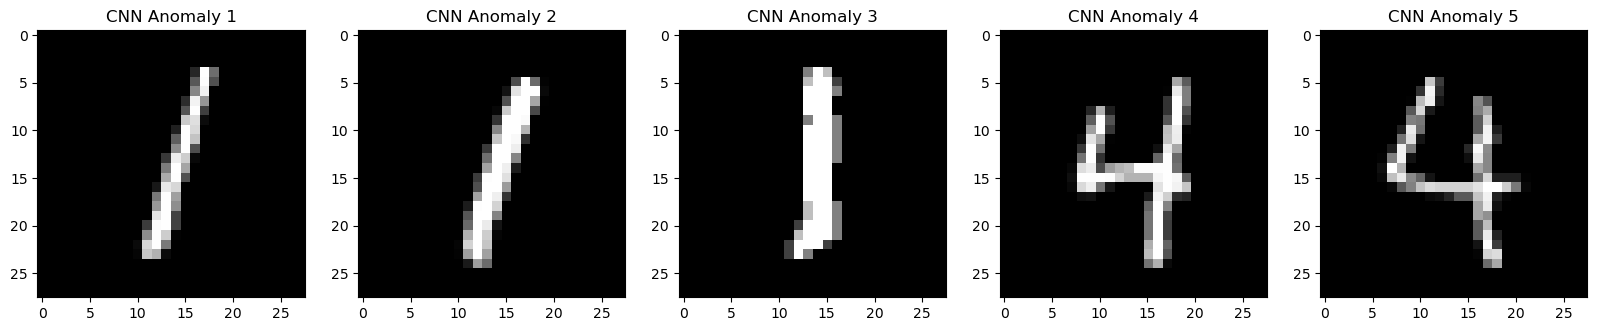

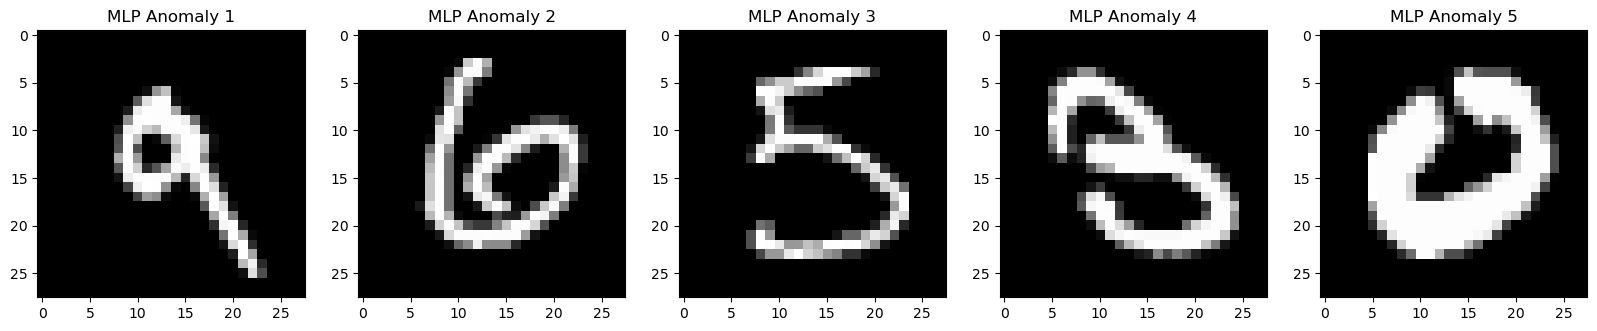

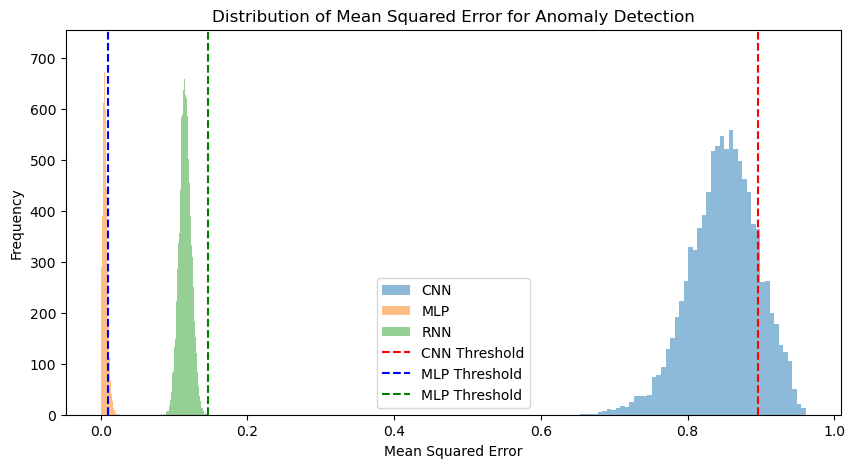

In [55]:
# Make predictions using CNN model
cnn_predictions = model_cnn.predict(x_test_cnn)

# # Calculate MSE for CNN model

x_test_reshaped = x_test_cnn.reshape((10000, -1))

# Calculate MSE for CNN model
cnn_mse = np.mean(np.power(x_test_reshaped - cnn_predictions, 2), axis=1)


# Calculate threshold for anomaly detection
cnn_threshold = np.mean(cnn_mse) + np.std(cnn_mse)

# Identify anomalies using CNN model
cnn_anomalies = x_test_cnn[cnn_mse > cnn_threshold]


# Make predictions using MLP model
mlp_predictions = model_mlp.predict(x_test_mlp)

# Calculate mean squared error for each sample
mlp_mse = np.mean(np.power(x_test_mlp - mlp_predictions, 2), axis=1)

# Calculate threshold for anomaly detection
mlp_threshold = np.mean(mlp_mse) + np.std(mlp_mse)

# Identify anomalies in test set
mlp_anomalies = x_test_mlp[mlp_mse > mlp_threshold]

# Plot anomalies detected by CNN model
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(cnn_anomalies[i].reshape(28, 28), cmap='gray')
    ax.set_title('CNN Anomaly {}'.format(i+1))
plt.show()

# Plot anomalies detected by MLP model
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(mlp_anomalies[i].reshape(28, 28), cmap='gray')
    ax.set_title('MLP Anomaly {}'.format(i+1))
plt.show()

# Plot distribution of mean squared error for CNN and MLP models
plt.figure(figsize=(10, 5))
plt.hist(cnn_mse, bins=50, label='CNN', alpha=0.5)
plt.hist(mlp_mse, bins=50, label='MLP', alpha=0.5)
plt.hist(rnn_mse, bins=50, label='RNN', alpha=0.5)
plt.axvline(x=cnn_threshold, color='red', linestyle='--', label='CNN Threshold')
plt.axvline(x=mlp_threshold, color='blue', linestyle='--', label='MLP Threshold')
plt.axvline(x=rnn_threshold, color='green', linestyle='--', label='MLP Threshold')

plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Squared Error for Anomaly Detection')
plt.legend()
plt.show()


In [56]:
print("MSE mean for CNN Model: ", np.mean(cnn_mse))
print("MSE standard deviation for CNN Model: ", np.std(cnn_mse))
print("Threshold for CNN Model: ", cnn_threshold)
print("Number of anomalies detected for CNN Model: ", len(cnn_anomalies))



MSE mean for CNN Model:  0.8489288934318825
MSE standard deviation for CNN Model:  0.04647994184374929
Threshold for CNN Model:  0.8954088352756318
Number of anomalies detected for CNN Model:  1588


In [57]:
print("MSE mean for MLP Model: ", np.mean(mlp_mse))
print("MSE standard deviation for MLP Model: ", np.std(mlp_mse))
print("Threshold for MLP Model: ", mlp_threshold)
print("Number of anomalies detected for MLP Model: ", len(mlp_anomalies))

MSE mean for MLP Model:  0.006330703706092767
MSE standard deviation for MLP Model:  0.0033545304289934507
Threshold for MLP Model:  0.009685234135086217
Number of anomalies detected for MLP Model:  1447


In [58]:
print("MSE mean for RNN Model: ", np.mean(rnn_mse))
print("MSE standard deviation for RNN Model: ", np.std(rnn_mse))
print("Threshold for RNN Model: ", rnn_threshold)
print("Number of anomalies detected for RNN Model: ", len(rnn_anomalies))

MSE mean for RNN Model:  0.1150777968168237
MSE standard deviation for RNN Model:  0.008121238886412042
Threshold for RNN Model:  0.14621358131623385
Number of anomalies detected for RNN Model:  0


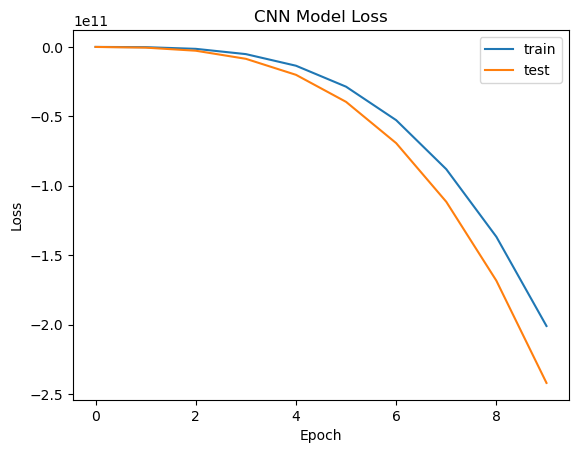

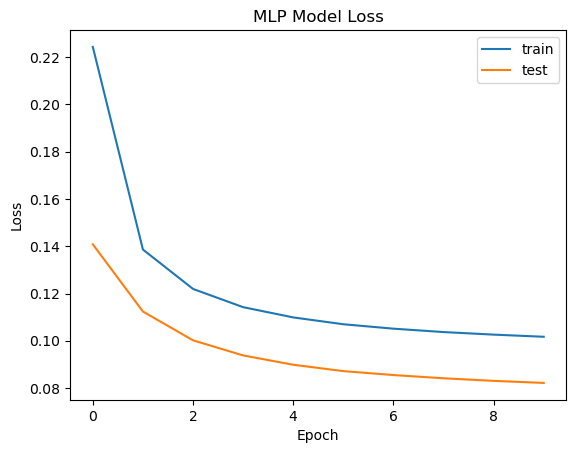

In [59]:
# Plot the training and validation loss for the CNN model
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='test')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




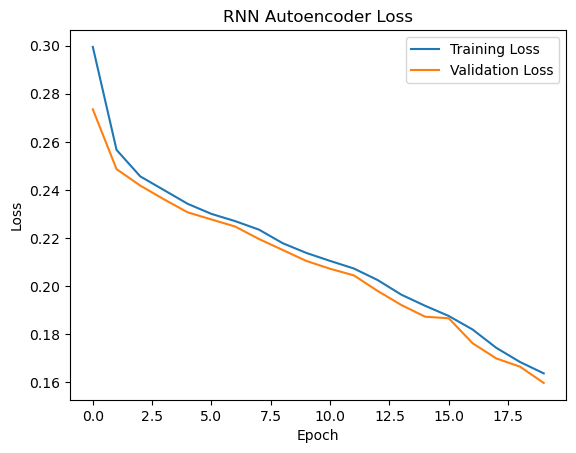

In [63]:

# Plot the training and validation losses for RNN Model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()